# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73043.91 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 103726.69 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 115944.95 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 123660.13 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 136620.42 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 145780.17 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  16%|█▌        | 18000/112120 [00:00<00:01, 61826.31 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 125316.01 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 139722.83 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 144741.74 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 150548.03 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.90 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.63 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.38 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 50.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.91 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.26 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:04, 15.99 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.89 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.96 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.31 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.79 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.98 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.67 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.54 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.85 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.83 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.45 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.18 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.73 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.76 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.10 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.70 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.13 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.38 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.86 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.05 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 46.01 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.20 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.31 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.23 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.81 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.79 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.74 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.67 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.46 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.75 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.59 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.15 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.34 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.27 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.66 examples/s]

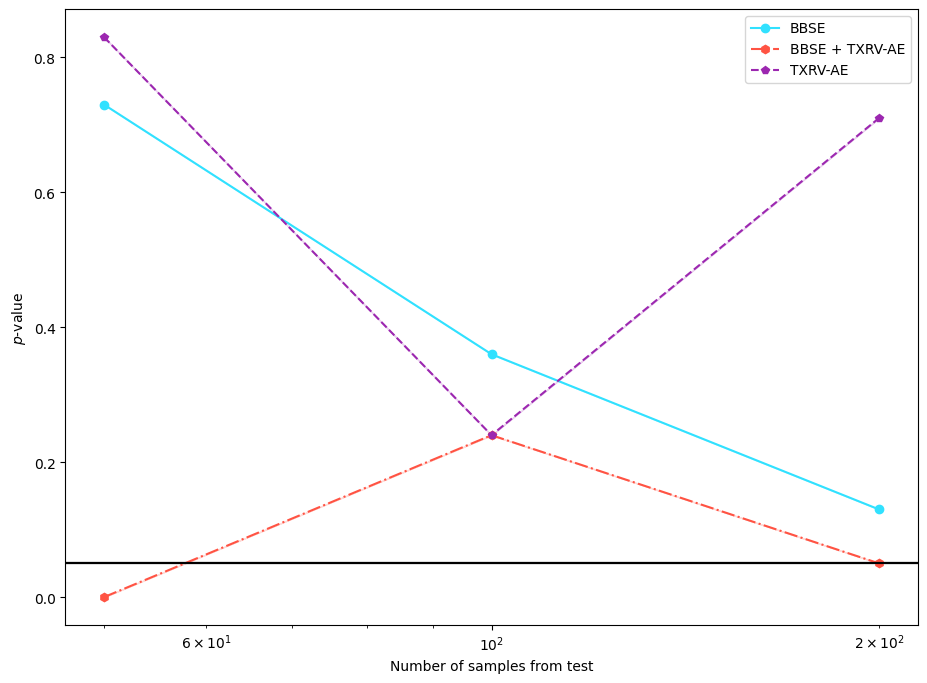

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.52 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.81 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.69 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.07 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.04 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.81 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.81 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.73 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.51 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.45 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.55 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.45 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.16 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.62 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.94 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.19 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.20 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.63 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.71 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.88 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.25 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.86 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.31 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.94 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.43 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.54 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.49 examples/s]

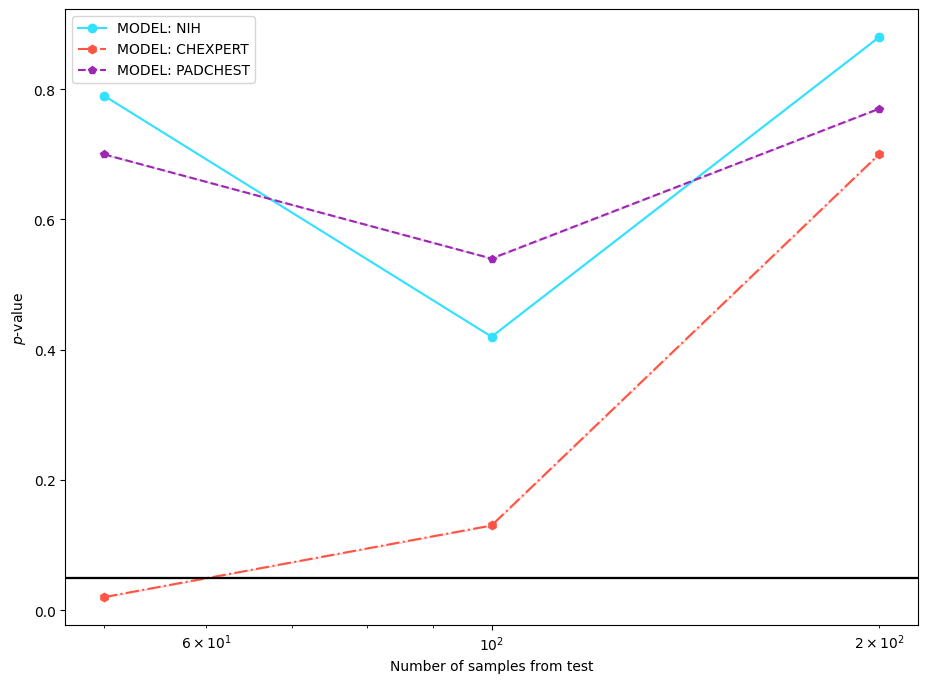

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54254.52 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79055.30 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92951.89 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 104609.89 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108685.49 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112479.69 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 46140.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70005.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87531.32 examples/s]

Filter (num_proc=6):  64%|██████▍   | 72061/112120 [00:00<00:00, 91233.29 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 112262.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 115578.50 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.01 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.52 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.04 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.73 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.68 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.07 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.50 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.95 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51559.61 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72936.71 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86190.10 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98686.43 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 113229.73 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 119201.35 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50395.82 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70306.05 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 81547.97 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93962.51 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101978.69 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108493.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.22 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.93 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.50 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.50 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.25 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.24 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.05 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.71 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.01 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.25 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.99 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.56 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.32 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.91 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54069.00 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80281.00 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93144.99 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 104129.51 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110075.40 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 116758.69 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53178.01 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78941.93 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93131.92 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 88054.00 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 118990.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.06 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.78 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.14 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.84 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.53 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.22 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.95 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.01 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.94 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.94 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.60 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54346.05 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79822.76 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 94539.07 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 102947.88 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108349.44 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113286.14 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50042.14 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71845.60 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86751.43 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96180.21 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114777.38 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 127476.81 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.14 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.33 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.32 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.78 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.46 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.48 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.06 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.35 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.05 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.29 examples/s]

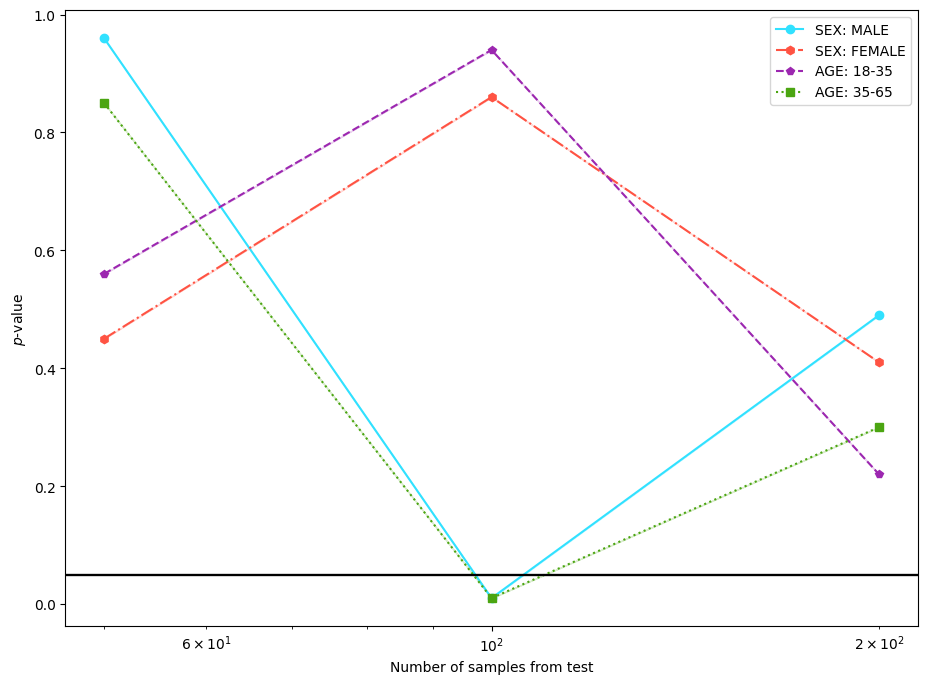

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.22 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.61 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.07 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.21 examples/s]

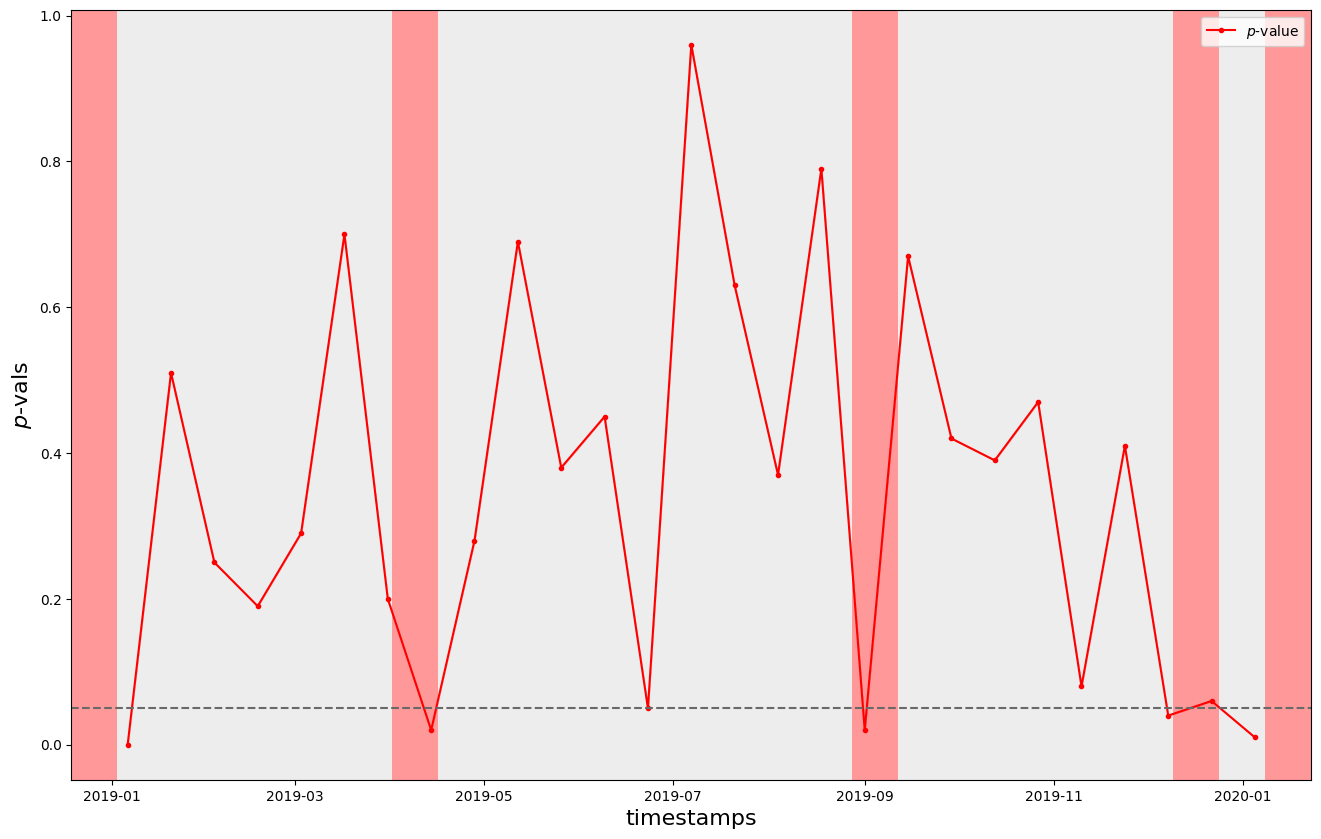

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)